In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from types import SimpleNamespace

### Load Data 

In [11]:
def read_data() -> pd.DataFrame: 
  dataset = pd.read_csv("student_performance.csv")
  return dataset

df = read_data()
df.head()

,student_id,age,gender,school_type,parent_education,study_hours,attendance_percentage,internet_access,travel_time,extra_activities,study_method,math_score,science_score,english_score,overall_score,final_grade
0,1,14,male,public,post graduate,3.1,84.3,yes,<15 min,yes,notes,42.7,55.4,57.0,53.1,e
1,2,18,female,public,graduate,3.7,87.8,yes,>60 min,no,textbook,57.6,68.8,64.8,61.3,d
2,3,17,female,private,post graduate,7.9,65.5,no,<15 min,no,notes,84.8,95.0,79.2,89.6,b
3,4,16,other,public,high school,1.1,58.1,no,15-30 min,no,notes,44.4,27.5,54.7,41.6,e
4,5,16,female,public,high school,1.3,61.0,yes,30-60 min,yes,group study,8.9,32.7,30.0,25.4,f


### Histogramm settings

In [12]:
config = SimpleNamespace(
  data= df, 
  shrink = 0.3, 
  discrete = True, 
  color = "darkblue"
)

### Visualize Dataset for Powerpoint slides

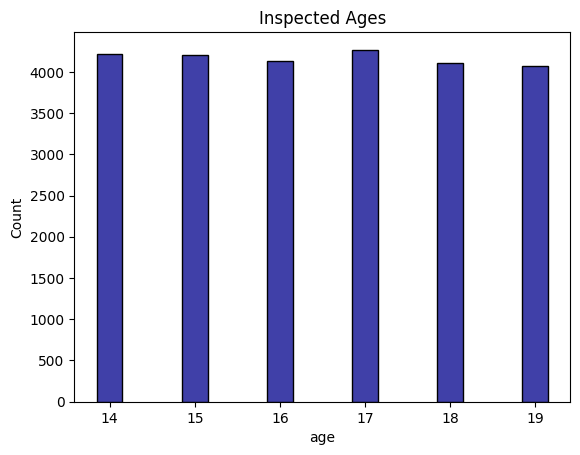

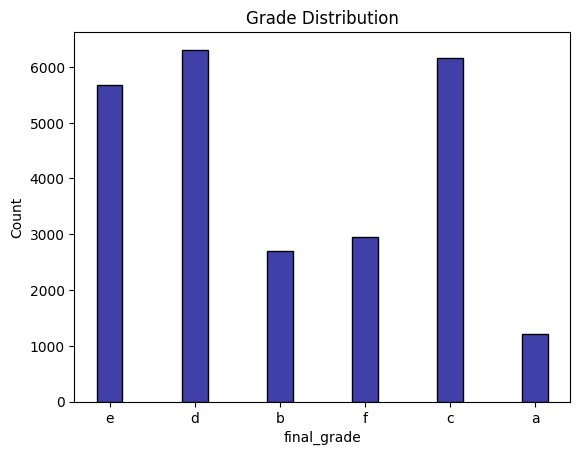

In [13]:
def simple_plot(x_axis, title="") ->None: 
  sns.histplot(data=config.data, x=x_axis, discrete=config.discrete, 
               shrink=config.shrink, color=config.color)
  plt.title(title)
  plt.show()

##just call the function with which attribute you want to be displayed oin the x axis and the title of the histogramm
simple_plot(x_axis="age", title="Inspected Ages")
simple_plot(x_axis="final_grade", title="Grade Distribution")

### Check how the parents education distributes to check weather a comparison based on grouping data is needed

In [ ]:
print(df["parent_education"].value_counts())

parent_education
diploma          4314
high school      4205
post graduate    4196
graduate         4127
no formal        4079
phd              4079
Name: count, dtype: int64


### Split data into each parent eduaction categorie and create a map

In [27]:
df_parent_education = df["parent_education"]

df_diploma = df[df_parent_education == "diploma"]
df_high_school = df[df_parent_education == "high school"]
df_post_graduate = df[df_parent_education == "post graduate"]
df_graduate = df[df_parent_education == "graduate"]
df_no_formal = df[df_parent_education == "no formal"]
df_phd = df[df_parent_education == "phd"]

parent_edu_df_map = {
  "diploma": df_diploma, 
  "high school": df_high_school, 
  "post graduate": df_post_graduate, 
  "graduate": df_graduate, 
  "no formal": df_no_formal, 
  "phd": df_phd
}

### Check weather the Sub Groups are normal distributed

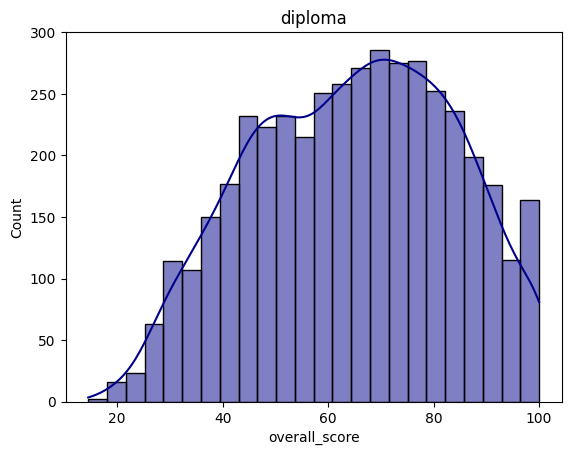

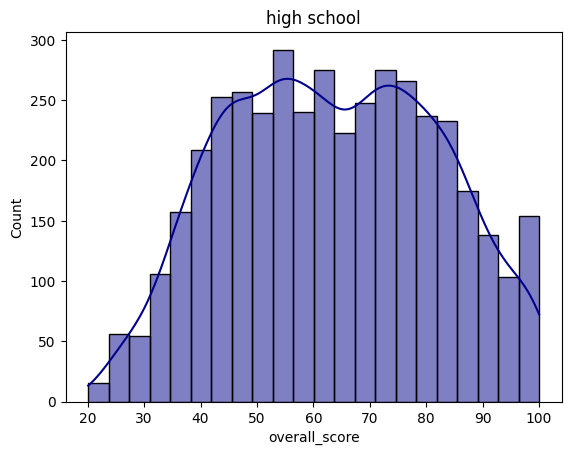

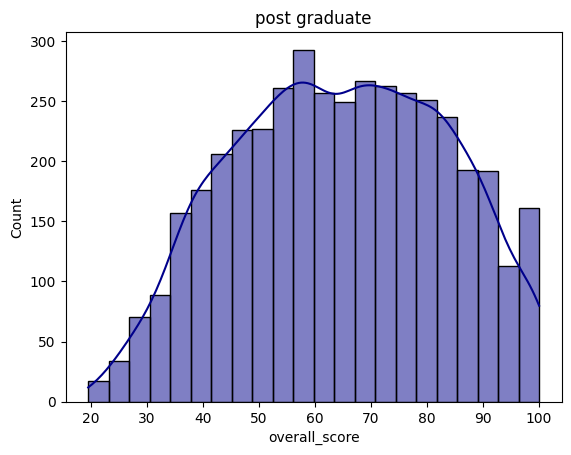

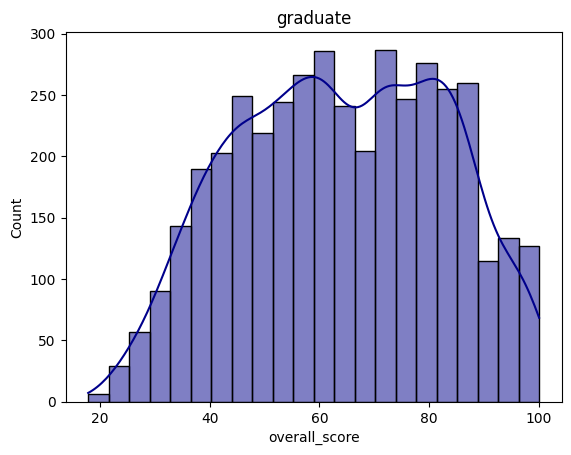

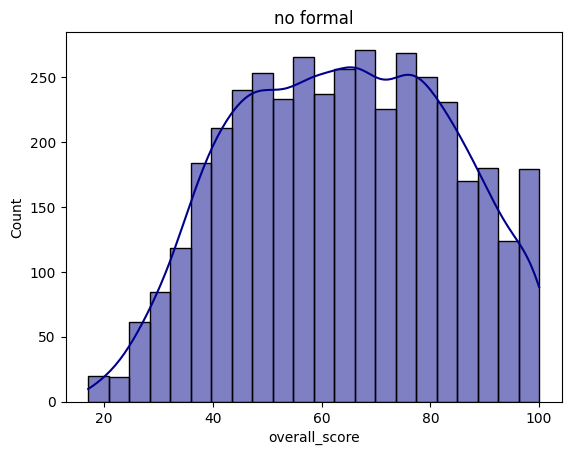

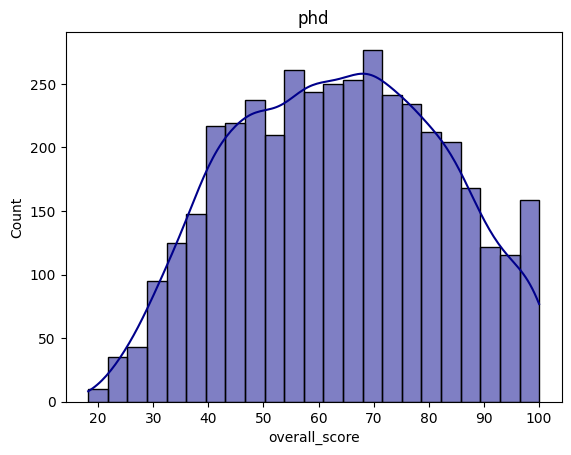

In [33]:
def plot_normal_distribution(dataset, title) -> None: 
  sns.histplot(data=dataset, x="overall_score", color=config.color, kde=True)
  plt.title(title)
  plt.show()

for title, group in parent_edu_df_map.items(): 
  ## TODO: Is the visual check sufficent? 
  plot_normal_distribution(group, title)